# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.002
0.0
-0.001
-0.004
-0.004
0.0
0.0
0.0
-0.001
-0.001
-0.004
-0.001
-0.003
-0.003
-0.003
-0.003
-0.003
0.0
0.0
-0.001
-0.003
-0.001
-0.001
-0.002
-0.002
0.0
0.0
0.001
-0.002
-0.003
-0.004
-0.003
-0.003
-0.003
-0.007
-0.007
1.0
0.999
0.997
0.996
1.977
1.977
1.972
1.978
1.978
2.952
2.955
2.955
2.956
3.928
3.928
3.929
3.928
4.908
4.908
4.909
4.909
4.91
5.894
5.895
5.895
6.653
6.653
6.656
7.425
7.425
7.424
7.427
8.423
8.427
8.428
8.428
8.43
9.408
9.408
9.408
9.408
10.392
10.394
10.398
10.397
10.399
11.378
11.381
11.384
11.384
11.384
12.385
12.385
12.383
12.383
13.383
13.383
13.383
13.383
14.109
14.11
14.109
14.11
14.829
14.832
14.833
14.832
14.832
15.81
15.807
15.806
15.807
16.809
16.809
16.809
16.809
17.813
17.813
17.813
17.813
18.812
18.81
18.812
18.815
19.814
19.814
19.813
19.812
20.816
20.816
20.816
21.456
21.454
21.45
21.45
22.087
22.089
22.088
22.086
22.087
23.077
23.078
23.082
24.066
24.06
24.06
25.049
25.049
25.05
26.041
26.041
26.039
26.039
27.029
27.029
27.029
27.029
27.029
28

58.6
58.613
58.618
58.618
58.614
58.615
58.615
58.616
58.616
58.616
58.617
58.614
58.613
58.607
58.606
58.61
58.611
58.609
58.611
58.611
58.611
58.607
58.608
58.61
58.61
58.61
58.61
58.61
58.61
58.611
58.614
58.61
58.613
58.611
58.61
58.61
58.609
58.613
58.61
58.61
58.609
58.612
58.61
58.61
58.611
58.608
58.605
58.606
58.605
58.606
58.606
58.634
58.812
58.81
58.809
58.81
58.807
58.812
58.812
58.812
58.811
58.81
58.796
58.793
58.797
58.824
58.824
58.824
58.828
58.827
58.826
58.826
58.826
58.825
58.825
58.825
58.825
58.827
58.825
58.825
58.822
58.825
58.823
58.823
58.823
58.824
58.827
58.825
58.821
58.819
58.819
58.819
58.82
58.822
58.822
58.823
58.823
58.82
58.821
58.821
58.821
58.82
58.819
58.818
58.817
58.82
58.841
58.927
58.955
58.982
59.008
59.063
59.064
59.08
59.08
59.081
59.081
59.079
59.078
59.081
59.08
59.08
59.08
59.078
59.078
59.077
59.078
59.078
59.079
59.079
59.076
59.077
59.074
59.075
59.076
59.075
59.073
59.073
59.074
59.073
59.077
59.077
59.077
59.073
59.075
59.076
59.076

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.002
1,2,0.000
2,4,-0.001
3,6,-0.004
4,8,-0.004
...,...,...
1495,2990,60.244
1496,2992,60.247
1497,2994,60.246
1498,2996,60.245


<IPython.core.display.Javascript object>


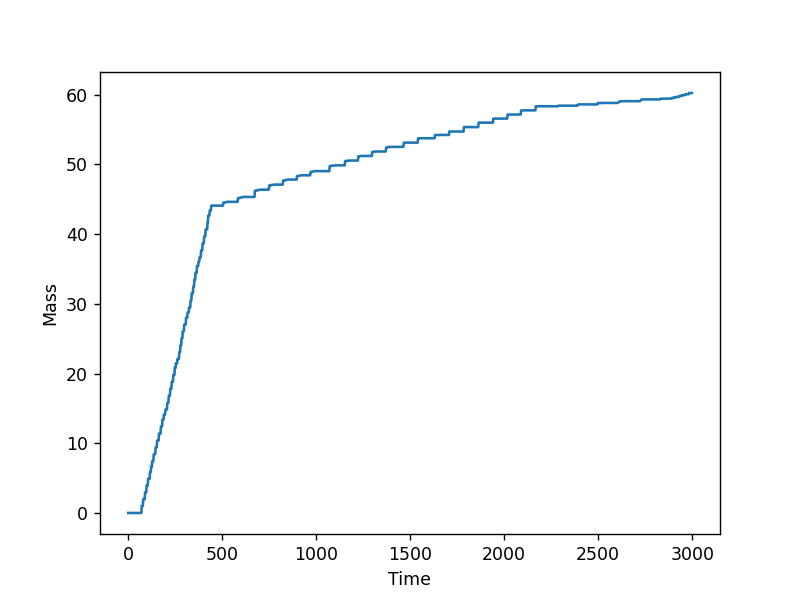

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_110423_S295-300.csv')